In this tutorial, we will analyze Desmoid dataset from the [WORC Database](https://github.com/MStarmans91/WORCDatabase/tree/development).

The task is to correctly identify segmented lesions as either **desmoid-type fibromatosis** or **extremity soft-tissue sarcoma**.


More details on the dataset as well as the original analysis performed by their authors can be found here:

`Starmans, M. P. A. et al. (2021). The WORC* database: MRI and CT scans, segmentations, and clinical labels for 932 patients from six radiomics studies. Submitted, preprint available from https://doi.org/10.1101/2021.08.19.21262238`

`The experiments are described in the following paper: Starmans, M. P. A. et al. (2021). Reproducible radiomics through automated machine learning validated on twelve clinical applications. Submitted, preprint available from https://arxiv.org/abs/2108.08618.`

In [ ]:
# In case you haven't installed AutoRadiomics
!pip install autorad

In [1]:
from autorad.external.download_WORC import download_WORCDatabase
from pathlib import Path
import pandas as pd

# Set where we will save our data and results
base_dir = Path.cwd() / "autorad_tutorial"
data_dir = base_dir / "data"
result_dir = base_dir / "results"
data_dir.mkdir(exist_ok=True, parents=True)
result_dir.mkdir(exist_ok=True, parents=True)

%load_ext autoreload
%autoreload 2

In [ ]:
# download data (it may take a few minutes)
download_WORCDatabase(
    dataset="Desmoid",
    data_folder=data_dir,
    n_subjects=100,
    )

In [80]:
!ls $data_dir

Desmoid-004 Desmoid-038 Desmoid-082 Desmoid-111 Desmoid-147 Desmoid-177
Desmoid-006 Desmoid-039 Desmoid-084 Desmoid-112 Desmoid-150 Desmoid-179
Desmoid-009 Desmoid-040 Desmoid-088 Desmoid-113 Desmoid-152 Desmoid-180
Desmoid-011 Desmoid-043 Desmoid-091 Desmoid-114 Desmoid-153 Desmoid-182
Desmoid-014 Desmoid-046 Desmoid-093 Desmoid-115 Desmoid-154 Desmoid-183
Desmoid-016 Desmoid-054 Desmoid-095 Desmoid-116 Desmoid-159 Desmoid-184
Desmoid-017 Desmoid-055 Desmoid-096 Desmoid-119 Desmoid-162 Desmoid-185
Desmoid-021 Desmoid-056 Desmoid-098 Desmoid-121 Desmoid-163 Desmoid-189
Desmoid-022 Desmoid-059 Desmoid-100 Desmoid-122 Desmoid-165 Desmoid-190
Desmoid-023 Desmoid-060 Desmoid-101 Desmoid-126 Desmoid-166 Desmoid-193
Desmoid-024 Desmoid-062 Desmoid-102 Desmoid-128 Desmoid-169 Desmoid-194
Desmoid-025 Desmoid-068 Desmoid-103 Desmoid-129 Desmoid-170 Desmoid-195
Desmoid-026 Desmoid-071 Desmoid-104 Desmoid-130 Desmoid-171 Desmoid-198
Desmoid-028 Desmoid-074 Desmoid-107 Desmoid-134 Desmoid-172 Desm

In [81]:
from autorad.data.utils import get_paths_with_separate_folder_per_case

# create a table with all the paths
paths_df = get_paths_with_separate_folder_per_case(data_dir, relative=True)
paths_df.sample(5)

,ID,image_path,segmentation_path
94,Desmoid-009,Desmoid-009/image.nii.gz,Desmoid-009/segmentation.nii.gz
0,Desmoid-074,Desmoid-074/image.nii.gz,Desmoid-074/segmentation.nii.gz
63,Desmoid-103,Desmoid-103/image.nii.gz,Desmoid-103/segmentation.nii.gz
89,Desmoid-096,Desmoid-096/image.nii.gz,Desmoid-096/segmentation.nii.gz
13,Desmoid-165,Desmoid-165/image.nii.gz,Desmoid-165/segmentation.nii.gz


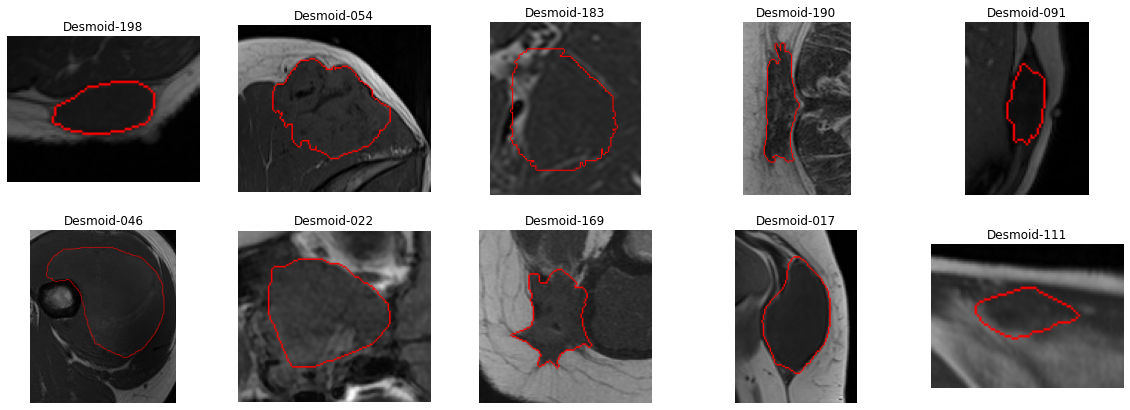

In [82]:
from autorad.data.dataset import ImageDataset
from autorad.feature_extraction.extractor import FeatureExtractor
import logging

logging.getLogger().setLevel(logging.CRITICAL)

image_dataset = ImageDataset(
    paths_df,
    ID_colname="ID",
    root_dir=data_dir,
)

# Let's take a look at the data, plotting random 10 cases
image_dataset.plot_examples(n=10, window=None)

In [83]:
extractor = FeatureExtractor(image_dataset, extraction_params="default_MR.yaml")
feature_df = extractor.run()

100it [02:13,  1.33s/it]


In [84]:
feature_df.head()

,ID,image_path,segmentation_path,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,Desmoid-074,/Users/p.woznicki/git/AutoRadiomics/examples/a...,/Users/p.woznicki/git/AutoRadiomics/examples/a...,v3.0.1,1.22.1,2.1.1.2,1.2.0,3.10.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",...,0.09364225285965076,0.0020106471542853657,0.1604221958125694,154.59031374778954,0.0004037488625501188,0.7482961240892383,0.0004442332208722315,5875.243768469462,0.024981087368858863,2.3650769782697085
1,Desmoid-011,/Users/p.woznicki/git/AutoRadiomics/examples/a...,/Users/p.woznicki/git/AutoRadiomics/examples/a...,v3.0.1,1.22.1,2.1.1.2,1.2.0,3.10.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",...,0.01645733471393253,0.0007994598617059055,0.23754652941863436,755.5959923635118,0.0002192726518890093,0.0848940242889145,0.002415714070684505,10870.016237393145,0.09774824569895392,17.52738638275591
2,Desmoid-016,/Users/p.woznicki/git/AutoRadiomics/examples/a...,/Users/p.woznicki/git/AutoRadiomics/examples/a...,v3.0.1,1.22.1,2.1.1.2,1.2.0,3.10.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",...,0.14926333576809553,0.04580602433297548,0.9482758620689655,8401.258620689656,0.01994169647419545,0.007245165042991185,0.04304408369337778,59786.729500750545,42.22125738891177,502.7619006538285
3,Desmoid-043,/Users/p.woznicki/git/AutoRadiomics/examples/a...,/Users/p.woznicki/git/AutoRadiomics/examples/a...,v3.0.1,1.22.1,2.1.1.2,1.2.0,3.10.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",...,0.1819094347186305,0.011577516167563365,0.28827533950028905,132.25242376140565,0.002827722920173325,0.1012570099626087,0.01474656631810172,2358.6901530820264,0.17872754150760153,13.098294066297127
4,Desmoid-088,/Users/p.woznicki/git/AutoRadiomics/examples/a...,/Users/p.woznicki/git/AutoRadiomics/examples/a...,v3.0.1,1.22.1,2.1.1.2,1.2.0,3.10.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",...,0.0041612522715183675,0.003951433099856481,0.7976059941520468,3513.162189327485,0.003909859962614113,0.010387814165132113,0.018037594756083835,41901.34007117845,1.6863170100495721,52.5786133788846


In [85]:
label_df = pd.read_csv(data_dir / "labels.csv")
label_df.sample(5)

,patient_ID,diagnosis
19,Desmoid-076,1
68,Desmoid-025,0
95,Desmoid-201,0
31,Desmoid-173,1
30,Desmoid-185,1


In [86]:
from autorad.data.dataset import FeatureDataset

merged_feature_df = feature_df.merge(label_df, left_on="ID",
    right_on="patient_ID", how="left")
feature_dataset = FeatureDataset(
    merged_feature_df,
    target="diagnosis",
    ID_colname="ID"
)

Split the data into training/validation/test sets with stratification:

In [109]:
splits_path = result_dir / "splits.json"
feature_dataset.split(method="train_val_test", save_path=splits_path)

{'split_type': 'stratified split: 60% train + 20% validation + 20% test',
 'train': ['Desmoid-165',
  'Desmoid-059',
  'Desmoid-163',
  'Desmoid-190',
  'Desmoid-141',
  'Desmoid-030',
  'Desmoid-150',
  'Desmoid-022',
  'Desmoid-084',
  'Desmoid-162',
  'Desmoid-009',
  'Desmoid-147',
  'Desmoid-111',
  'Desmoid-112',
  'Desmoid-171',
  'Desmoid-028',
  'Desmoid-128',
  'Desmoid-136',
  'Desmoid-062',
  'Desmoid-166',
  'Desmoid-104',
  'Desmoid-170',
  'Desmoid-184',
  'Desmoid-004',
  'Desmoid-140',
  'Desmoid-068',
  'Desmoid-199',
  'Desmoid-134',
  'Desmoid-093',
  'Desmoid-153',
  'Desmoid-121',
  'Desmoid-056',
  'Desmoid-195',
  'Desmoid-103',
  'Desmoid-096',
  'Desmoid-189',
  'Desmoid-036',
  'Desmoid-043',
  'Desmoid-026',
  'Desmoid-152',
  'Desmoid-037',
  'Desmoid-119',
  'Desmoid-194',
  'Desmoid-109',
  'Desmoid-169',
  'Desmoid-101',
  'Desmoid-130',
  'Desmoid-100',
  'Desmoid-201',
  'Desmoid-039',
  'Desmoid-173',
  'Desmoid-025',
  'Desmoid-175',
  'Desmoid-114',

In [88]:
from autorad.training.trainer import Trainer
from autorad.models.classifier import MLClassifier

models = MLClassifier.initialize_default_sklearn_models()
print(models)

[Random Forest, Logistic Regression, SVM, XGBoost]


In [99]:
trainer = Trainer(
    dataset=feature_dataset,
    models=models,
    result_dir=result_dir,
    experiment_name="Fibromatosis_vs_sarcoma_classification",
)
trainer.run_auto_preprocessing(
        selection_methods=["boruta"],
        oversampling=False,
        )

In [100]:
trainer.set_optimizer("optuna", n_trials=30)
trainer.run(auto_preprocess=True)

[I 2022-06-07 19:01:01,098] A new study created in memory with name: Liver_detection
[I 2022-06-07 19:01:02,218] Trial 0 finished with value: 0.5 and parameters: {'feature_selection_method': 'boruta', 'oversampling_method': 'SMOTE', 'model': 'XGBoost', 'xgb_lambda': 0.014570271595538578, 'xgb_alpha': 0.00021300368327705253, 'colsample_bytree': 0.5136940145553204, 'xgb_subsample': 0.47454241292069554, 'xgb_booster': 'gbtree', 'xgb_max_depth': 5, 'xgb_min_child_weight': 8, 'xgb_eta': 2.883592210117951e-07, 'xgb_gamma': 2.53287670148807e-07, 'xgb_grow_policy': 'lossguide'}. Best is trial 0 with value: 0.5.
[I 2022-06-07 19:01:03,247] Trial 1 finished with value: 0.7252747252747254 and parameters: {'feature_selection_method': 'boruta', 'oversampling_method': 'ADASYN', 'model': 'Logistic Regression', 'lr_penalty': 'l1', 'lr_C': 0.3341215561348895}. Best is trial 1 with value: 0.7252747252747254.
[I 2022-06-07 19:01:10,135] Trial 2 finished with value: 0.6703296703296704 and parameters: {'fe

In [96]:
from autorad.utils import io
from autorad.visualization import plotly_utils
from autorad.training.trainer import Inferrer

best_params = io.load_json(result_dir / "best_params.json")
inferrer = Inferrer(params=best_params, result_dir=result_dir)
inferrer.fit_eval(feature_dataset, result_name="test")

results = pd.read_csv(result_dir / "test.csv")
plotly_utils.plot_roc_curve(results.y_true, results.y_pred_proba)

In [97]:
results

,y_true,y_pred_proba
0,1,0.960699
1,1,0.959114
2,1,0.942652
3,1,0.737638
4,1,0.243452
5,1,0.216666
6,1,0.132575
7,1,0.556299
8,1,0.767817
9,1,0.867902
